In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")

In [3]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
print(f"Data has {mpg_df.shape[0]} rows and {mpg_df.shape[1]} columns")

Data has 398 rows and 10 columns


In [5]:
mpg_df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type',
       'car_name'],
      dtype='object')

In [6]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [7]:
# drop the car name column as it is ID column and useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)

In [8]:
mpg_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [9]:
catCol = []
numCol = []
for i in mpg_df.columns:
    if mpg_df[i].dtype == 'object':
        catCol.append(i)
    else:
        numCol.append(i)

In [10]:
print("Categorical Columns: ", catCol)
print("Numerical Columns: ", numCol)

Categorical Columns:  ['hp']
Numerical Columns:  ['mpg', 'cyl', 'disp', 'wt', 'acc', 'yr', 'origin', 'car_type']


In [11]:
mpg_df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [12]:
mpg_df[catCol].describe().T

,count,unique,top,freq
hp,398,94,150,22


In [13]:
mpg_df.dtypes

,0
mpg,float64
cyl,int64
disp,float64
hp,object
wt,int64
acc,float64
yr,int64
origin,int64
car_type,int64


In [14]:
for i in catCol:
    print(i)
    print(mpg_df[i].value_counts())
    print("\n")

hp
hp
150    22
90     20
88     19
110    18
100    17
       ..
77      1
132     1
64      1
116     1
82      1
Name: count, Length: 94, dtype: int64




In [15]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit())
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [16]:
mpg_df[temp['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,?,2046,19.0,71,1,1
126,21.0,6,200.0,?,2875,17.0,74,1,0
330,40.9,4,85.0,?,1835,17.3,80,2,1
336,23.6,4,140.0,?,2905,14.3,80,1,1
354,34.5,4,100.0,?,2320,15.8,81,2,1
374,23.0,4,151.0,?,3035,20.5,82,1,1


In [17]:
mpg_df = mpg_df.replace('?', np.nan)

In [18]:
mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,NaN,2046,19.0,71,1,1
126,21.0,6,200.0,NaN,2875,17.0,74,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,2,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1
354,34.5,4,100.0,NaN,2320,15.8,81,2,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1


In [19]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [20]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [21]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [22]:
mpg_df.isna().sum()

,0
mpg,0
cyl,0
disp,0
hp,6
wt,0
acc,0
yr,0
origin,0
car_type,0


In [23]:
mpg_df.median()

,0
mpg,23.0
cyl,4.0
disp,148.5
hp,93.5
wt,2803.5
acc,15.5
yr,76.0
origin,1.0
car_type,1.0


In [24]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

mpg_df = pd.DataFrame(imp_median.fit_transform(mpg_df), columns = mpg_df.columns)

In [25]:
mpg_df.isna().sum()

,0
mpg,0
cyl,0
disp,0
hp,0
wt,0
acc,0
yr,0
origin,0
car_type,0


In [26]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])

In [27]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0.0,True,False,False
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0.0,True,False,False
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0.0,True,False,False
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0.0,True,False,False
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0.0,True,False,False


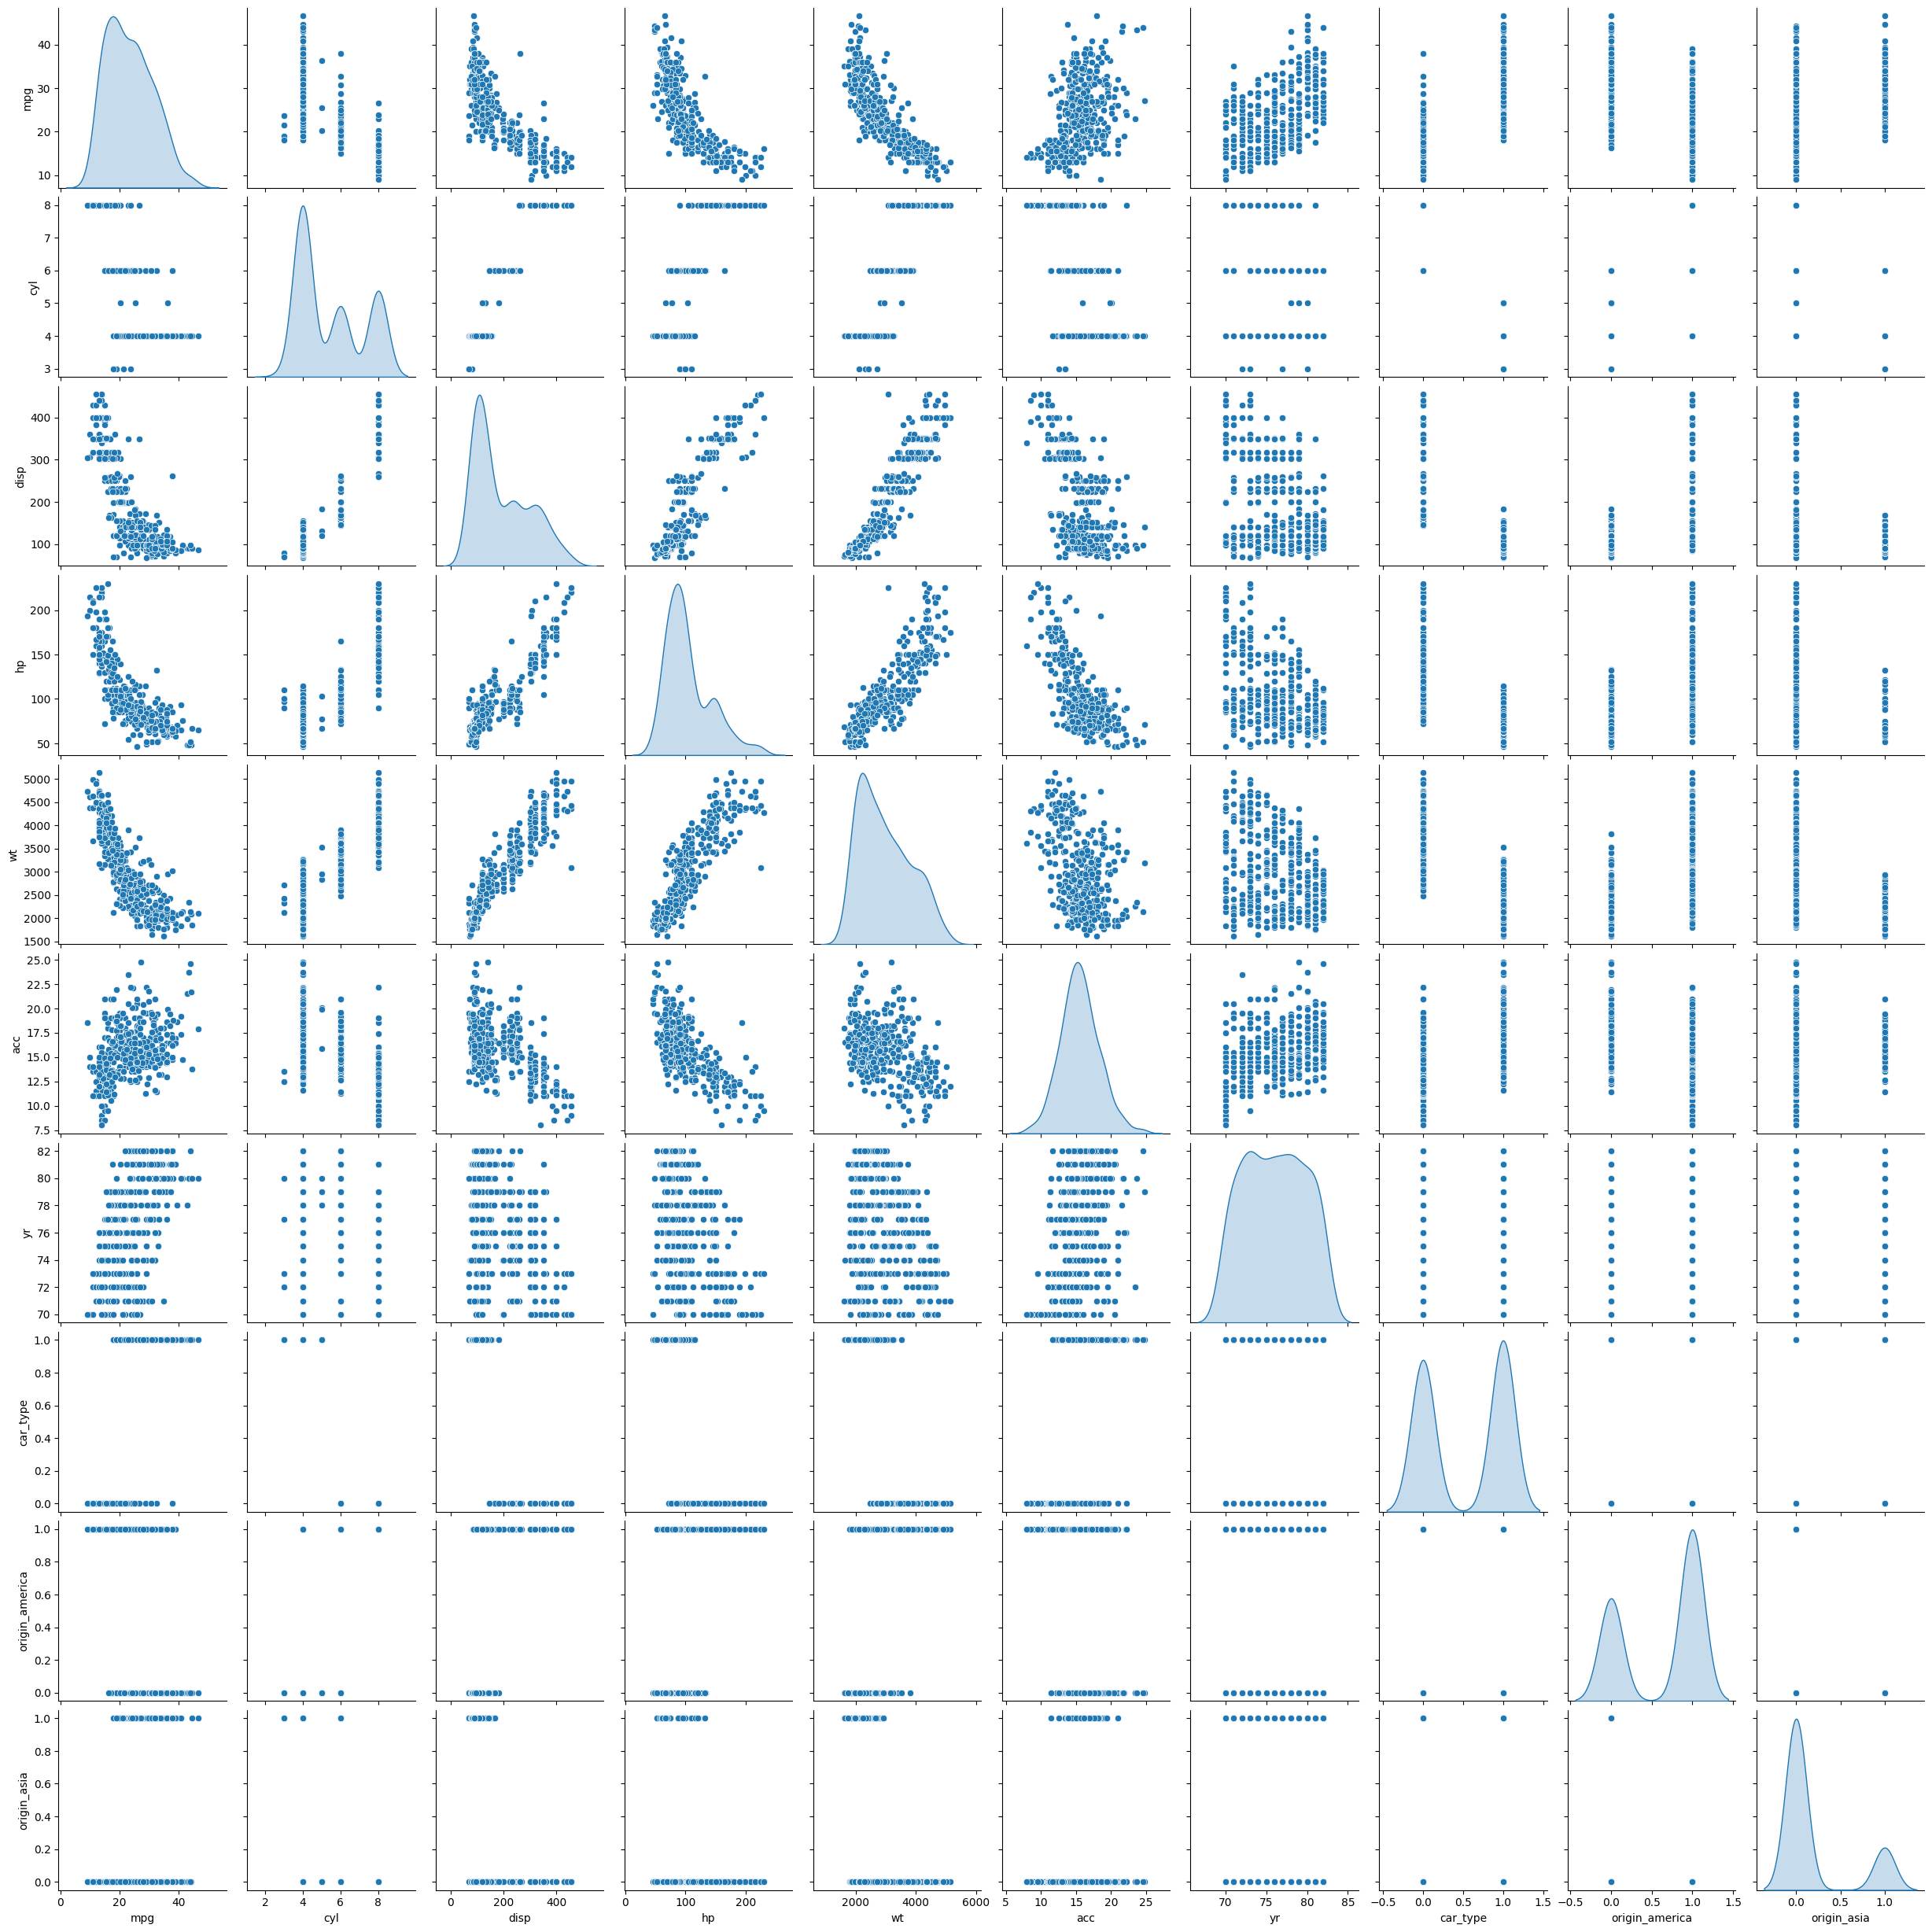

In [28]:
mpg_df_attr = mpg_df.iloc[:, 0:10]
sns.pairplot(mpg_df_attr, diag_kind='kde')

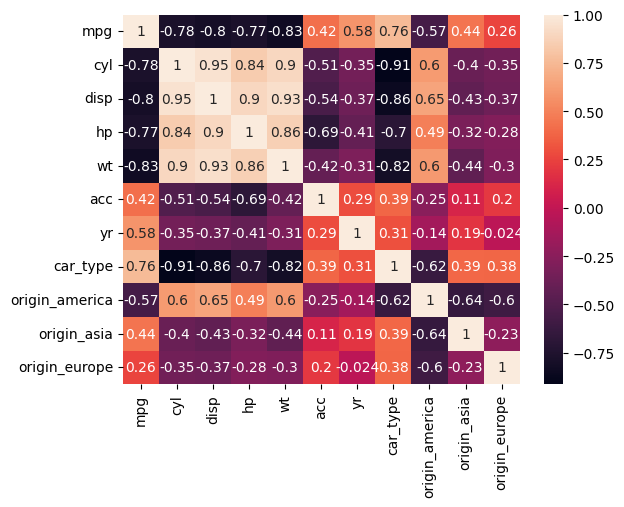

In [29]:
sns.heatmap(mpg_df.corr(), annot=True);

#### Linear Regression Model

In [30]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)
X = X.drop({'origin_america', 'origin_asia' ,'origin_europe'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(278, 7) (120, 7) (278, 1) (120, 1)


In [33]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.863717833626987
The coefficient for disp is 0.010066050755002911
The coefficient for hp is -0.03922900629589615
The coefficient for wt is -0.006414996525192772
The coefficient for acc is 0.011723809488668196
The coefficient for yr is 0.7588184849759381
The coefficient for car_type is 6.626521339249247


In [35]:
# Let us check the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -26.69336012583219


In [36]:
regression_model.score(X_train, y_train)

0.8258091181337589

In [37]:
regression_model.score(X_test, y_test)

0.8404952015294239

In [38]:
import math
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

3.053810365384955

#### Stats Model Linear Regression

In [39]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cyl,disp,hp,wt,acc,yr,car_type,mpg
350,4.0,105.0,63.0,2215.0,14.9,81.0,1.0,34.7
59,4.0,97.0,54.0,2254.0,23.5,72.0,1.0,23.0
120,4.0,121.0,112.0,2868.0,15.5,73.0,1.0,19.0
12,8.0,400.0,150.0,3761.0,9.5,70.0,0.0,15.0
349,4.0,91.0,68.0,1985.0,16.0,81.0,1.0,34.1


In [40]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type', data = data_train).fit()
lm1.params

,0
Intercept,-26.693360
cyl,1.863718
disp,0.010066
hp,-0.039229
wt,-0.006415
acc,0.011724
yr,0.758818
car_type,6.626521


In [41]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     182.9
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.41e-98
Time:                        10:32:13   Log-Likelihood:                -725.17
No. Observations:                 278   AIC:                             1466.
Df Residuals:                     270   BIC:                             1495.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6934      5.597     -4.769      0.0

In [42]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

3.053810365384955

In [43]:
regression_model.score(X_test, y_test)

0.8404952015294239

In [44]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

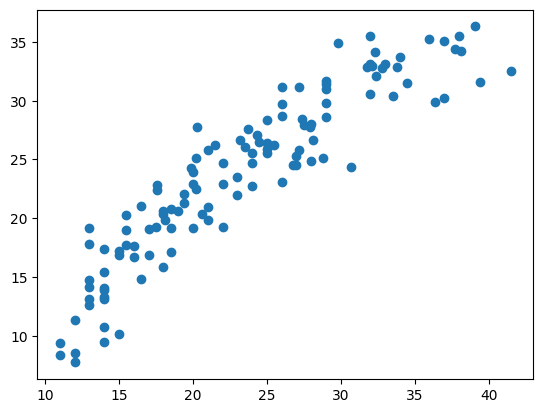

In [45]:
plt.scatter(y_test['mpg'], y_pred)

#### Model Improvement

In [46]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [47]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [48]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.3957470005920444
The coefficient for disp is 0.13057195254437337
The coefficient for hp is -0.18704682143280796
The coefficient for wt is -0.6881521871765552
The coefficient for acc is 0.004130471087878812
The coefficient for yr is 0.3556275988085081
The coefficient for car_type is 0.4197709075092132


In [49]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.852055326436817e-18


In [50]:
regression_model.score(X_test_scaled, y_test_scaled)

0.8460575288663481

In [51]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)
math.sqrt(mse)

0.3923550319973631

In [52]:
y_pred = regression_model.predict(X_test_scaled)

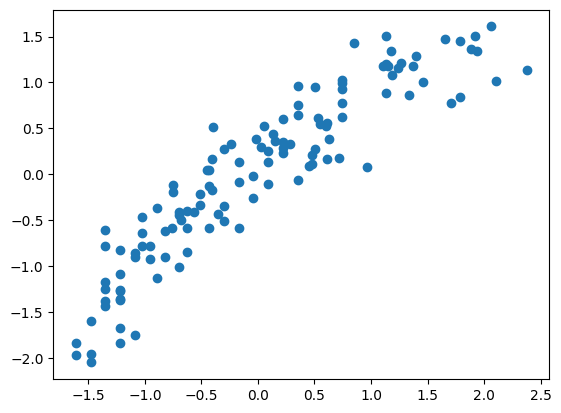

In [53]:
plt.scatter(y_test_scaled['mpg'], y_pred)

#### Ridge and Lasso Regression

In [54]:
from sklearn.linear_model import Ridge, Lasso

In [55]:
# Ridge Regression
rdg = Ridge(alpha=1.0)
rdg.fit(X_train_scaled, y_train_scaled)

Ridge()

In [57]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, rdg.coef_[0][idx]))

IndexError: invalid index to scalar variable.

In [ ]:
intercept = rdg.intercept_[0]
print("The intercept for our model is {}".format(intercept))

In [ ]:
rdg.score(X_test_scaled, y_test_scaled)

In [ ]:
mse = np.mean((rdg.predict(X_test_scaled)-y_test_scaled)**2)
math.sqrt(mse)

In [ ]:
# Lasso Regression
lss = Lasso(alpha=0.1)
lss.fit(X_train_scaled, y_train_scaled)

In [ ]:
lss.score(X_test_scaled, y_test_scaled)